# Data Visualization 01 - Heatmaps

Author: Bruno Conde Costa da Silva.

### Heatmap 01
Number of predicted miRNAs with score 100 per specie.

### Heatmap 02
Number of genes with miRNAs with score 100 per specie.

### Heatmap 03
Reazon between the number of genes with miRNAs with score 100 and the number of miRNAs with score 100.

### Heatmap 04
Number of all predicted miRNAs (including miRNAs with score less than 100).

### Heatmap 05
Reazon between the number of all predicted miRNAs and the number of miRNA swith score 100.

### Heatmap 06
Reazon between the number of all predicted micro RNAs and the number of all organism genes.

In [1]:
# Libraries and paths

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get current work directory and input files directory
dir_cwd = os.getcwd()
dir_input = os.path.join(dir_cwd, 'input')

# Get miRDB predictions directory
dir_predictions = os.path.join(dir_input, 'miRDB_prediction_files')
dir_predictions

# Get miRDB prediction files
list_prediction_files = os.listdir(dir_predictions)
list_prediction_files

['Plasmodium falciparum.xlsx',
 'Plasmodium vivax P01.xlsx',
 'Plasmodium ovale.xlsx',
 'Plasmodium knowlesi.xlsx',
 'Plasmodium reichenowi CDC.xlsx',
 'Plasmodium inui San Antonio 1.xlsx',
 'Plasmodium malariae.xlsx',
 'Plasmodium cynomolgi strain B.xlsx']

## Getting Data

In [2]:
list_df = []
list_num_mirnas_score_100 = []
list_num_genes_with_mirna_100 = []
list_reazon_num_genes_num_mirnas_100 = []
list_num_predicted_mirna_humans = []
list_reazon_num_predicted_mirna_humans_num_mirnas_score_100 = []
list_reazon_num_all_predicted_mirnas_num_all_organism_genes = []

# iterate over predictions
for index, prediction in enumerate(list_prediction_files):
    df = pd.read_excel(open(os.path.join(dir_predictions, prediction), 'rb'), sheet_name='Planilha1')
    list_df.append(df)
    
    '''
    get the df properties to show on heatmap
    '''    
    
    # number of mirnas with score 100
    num_mirnas_score_100 = list_df[index]['miRNA 100'].sum()    
    list_num_mirnas_score_100.append([num_mirnas_score_100])
    
    # number of genes with have score 100
    df_score_100 = df.loc[df['miRNA 100'] > 0]
    num_genes_with_mirna_score_100 = df_score_100['Gene'].count()
    list_num_genes_with_mirna_100.append([num_genes_with_mirna_score_100])
    
    # mean of number of scored 100 mirna per gene with scored 100 mirna
    num_total_mirna_score_100 = df['miRNA 100'].sum()
    mean = num_total_mirna_score_100/num_genes_with_mirna_score_100
    list_reazon_num_genes_num_mirnas_100.append([mean])
    
    # number of predicted mirna humans
    num_predicted_mirna_humans = df['#miRNA (Humans)'].sum()
    list_num_predicted_mirna_humans.append([num_predicted_mirna_humans])
    
    # reazon between the number of all mirna humans predicted and the mirnas with score 100
    mean = num_predicted_mirna_humans/num_mirnas_score_100
    list_reazon_num_predicted_mirna_humans_num_mirnas_score_100.append([mean])
    
    # reazon between the number of all mirna humans predicted and the all genes in the organism
    num_genes_nan = df['Gene'].isnull().sum()    
    num_all_organism_genes = df['Gene'].count() - num_genes_nan
    mean = num_predicted_mirna_humans/num_all_organism_genes               
    list_reazon_num_all_predicted_mirnas_num_all_organism_genes.append([mean])        

## Axes Styles

In [3]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': 'black',
 'axes.grid': False,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'black',
 'figure.facecolor': (1, 1, 1, 0),
 'grid.color': '#b0b0b0',
 'grid.linestyle': '-',
 'text.color': 'black',
 'xtick.color': 'black',
 'ytick.color': 'black',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'projecting',
 'patch.edgecolor': 'black',
 'image.cmap': 'viridis',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['DejaVu Sans',
  'Bitstream Vera Sans',
  'Computer Modern Sans Serif',
  'Lucida Grande',
  'Verdana',
  'Geneva',
  'Lucid',
  'Arial',
  'Helvetica',
  'Avant Garde',
  'sans-serif'],
 'patch.force_edgecolor': False,
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

## Plot

In [ ]:
list_num

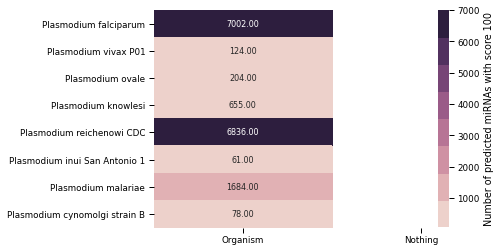

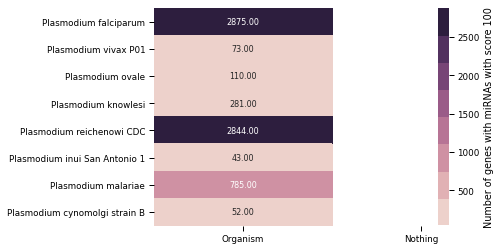

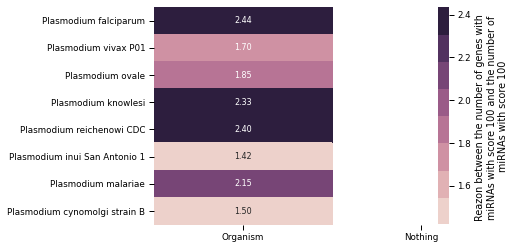

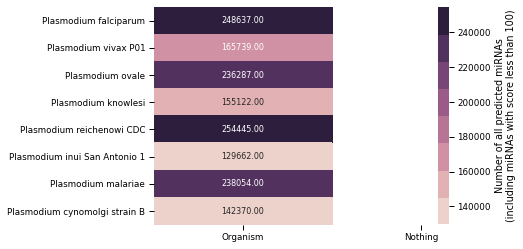

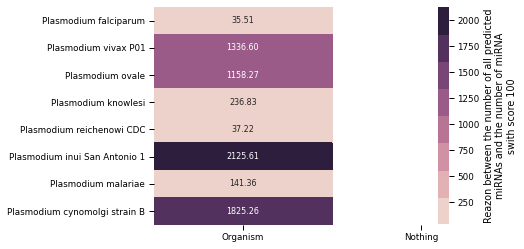

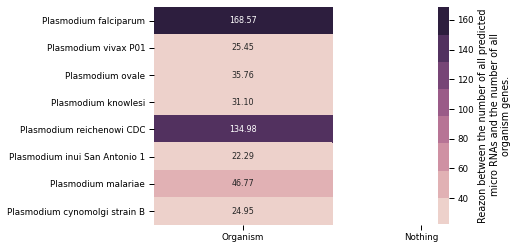

In [4]:
sns.set_context("paper", rc={"font.size":8})
'''
Datas
'''
list_datas = []
list_color_bar_legends = []

data = np.array(list_num_mirnas_score_100)
color_bar_legend = "Number of predicted miRNAs with score 100"
list_datas.append(data)
list_color_bar_legends.append(color_bar_legend)

data = np.array(list_num_genes_with_mirna_100)
color_bar_legend = "Number of genes with miRNAs with score 100"
list_datas.append(data)
list_color_bar_legends.append(color_bar_legend)


data = np.array(list_reazon_num_genes_num_mirnas_100)
color_bar_legend = "Reazon between the number of genes with \nmiRNAs with score 100 and the number of \nmiRNAs with score 100"
list_datas.append(data)
list_color_bar_legends.append(color_bar_legend)


data = np.array(list_num_predicted_mirna_humans)
color_bar_legend = "Number of all predicted miRNAs\n(including miRNAs with score less than 100)"
list_datas.append(data)
list_color_bar_legends.append(color_bar_legend)


data = np.array(list_reazon_num_predicted_mirna_humans_num_mirnas_score_100)
color_bar_legend = "Reazon between the number of all predicted\nmiRNAs and the number of miRNA\nswith score 100"
list_datas.append(data)
list_color_bar_legends.append(color_bar_legend)


data = np.array(list_reazon_num_all_predicted_mirnas_num_all_organism_genes)
color_bar_legend = "Reazon between the number of all predicted\n micro RNAs and the number of all\norganism genes."
list_datas.append(data)
list_color_bar_legends.append(color_bar_legend)


# print(data, sep='\n\n')

'''
Plot
'''

x_axis_labels = ['Organism', 'Nothing']
y_axis_labels = [elem.split(sep='.')[0] for elem in list_prediction_files]

for data, color_bar_legend in zip(list_datas, list_color_bar_legends):    
    plot_heatmap = sns.heatmap(data=data, 
                               xticklabels=x_axis_labels, 
                               yticklabels=y_axis_labels, 
                               vmin=np.amin(data), 
                               vmax=np.amax(data), 
                               cbar_kws={'label': color_bar_legend}, 
                               annot=True, 
                               fmt='.2f', 
                               cmap=sns.cubehelix_palette(8)
                              )
    
    # save figure
    path = os.path.join(os.getcwd(), 'output', color_bar_legend + '.png')
    plt.savefig(f'{path}', dpi=300, bbox_inches='tight')
    
    plt.show()    
    plt.clf()
    plt.close()

In [10]:
y_axis_labels, x_axis_labels

(['Plasmodium falciparum',
  'Plasmodium vivax P01',
  'Plasmodium ovale',
  'Plasmodium knowlesi',
  'Plasmodium reichenowi CDC',
  'Plasmodium inui San Antonio 1',
  'Plasmodium malariae',
  'Plasmodium cynomolgi strain B'],
 ['Organism', 'Nothing'])